In [6]:
import pandas as pd
import numpy as np
import cufflinks as cf
import plotly as py
import plotly.io
import seaborn as sns
import plotly.express as px

%matplotlib inline

from plotly.offline import  download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected = True)
cf.go_offline()

### INFO

I'm using interactive regime which compiles in 1st cell, but for GitHib pull I switch render to 'svg'

In [7]:
py.io.renderers.default = 'svg'
py.io.renderers

Renderers configuration
-----------------------
    Default renderer: 'svg'
    Available renderers:
        ['plotly_mimetype', 'jupyterlab', 'nteract', 'vscode',
         'notebook', 'notebook_connected', 'kaggle', 'azure', 'colab',
         'cocalc', 'databricks', 'json', 'png', 'jpeg', 'jpg', 'svg',
         'pdf', 'browser', 'firefox', 'chrome', 'chromium', 'iframe',
         'iframe_connected', 'sphinx_gallery', 'sphinx_gallery_png']

# Configs

In [8]:
def font_config(
        size: int
        ) -> dict:

    temp_config = dict(
        family = 'Arial',
        size = size,
        color = 'white',
        )

    return temp_config


x_axis_config = dict(
        showline = False,
        showgrid = True,
        showticklabels = True,
        linecolor = 'white',
        linewidth = 1,
        ticks = 'outside',
        tickfont = font_config(size = 18)
        )

y_axis_config = dict(
        showline = False,
        showgrid = True,
        showticklabels = True,
        linecolor = 'white',
        linewidth = 1,
        ticks = 'outside',
        tickfont = font_config(size = 18)
        )

margin_config = dict(
        autoexpand = True,
        l = 200,
        r = 20,
        t = 80,
        b = 20
        )

legend_config = dict(
        font = font_config(18)
        )

# Pie chart

In [9]:
df_asia: pd.DataFrame = px.data.gapminder()

df_asia = df_asia.query("continent == 'Asia'")
df_asia = df_asia.query("year == 2007")
df_asia = df_asia.query("pop > 24.e6")
df_asia = df_asia.sort_values(
        by = 'pop',
        ascending = False
        )
df_asia

,country,continent,year,lifeExp,pop,gdpPercap,iso_alpha,iso_num
299,China,Asia,2007,72.961,1318683096,4959.114854,CHN,156
707,India,Asia,2007,64.698,1110396331,2452.210407,IND,356
719,Indonesia,Asia,2007,70.650,223547000,3540.651564,IDN,360
1175,Pakistan,Asia,2007,65.483,169270617,2605.947580,PAK,586
107,Bangladesh,Asia,2007,64.062,150448339,1391.253792,BGD,50
803,Japan,Asia,2007,82.603,127467972,31656.068060,JPN,392
1223,Philippines,Asia,2007,71.688,91077287,3190.481016,PHL,608
1655,Vietnam,Asia,2007,74.249,85262356,2441.576404,VNM,704
731,Iran,Asia,2007,70.964,69453570,11605.714490,IRN,364
1535,Thailand,Asia,2007,70.616,65068149,7458.396327,THA,764


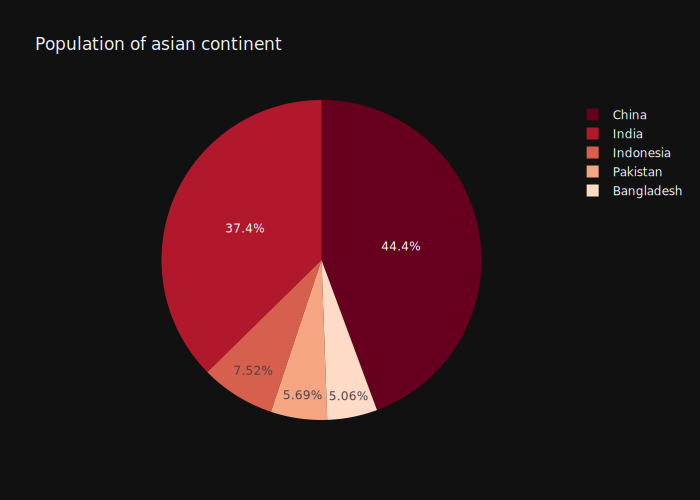

In [10]:
px.pie(
        data_frame = df_asia.head(5),
        values = 'pop',
        names = 'country',
        title = 'Population of asian continent',
        color_discrete_sequence = px.colors.sequential.RdBu
        )

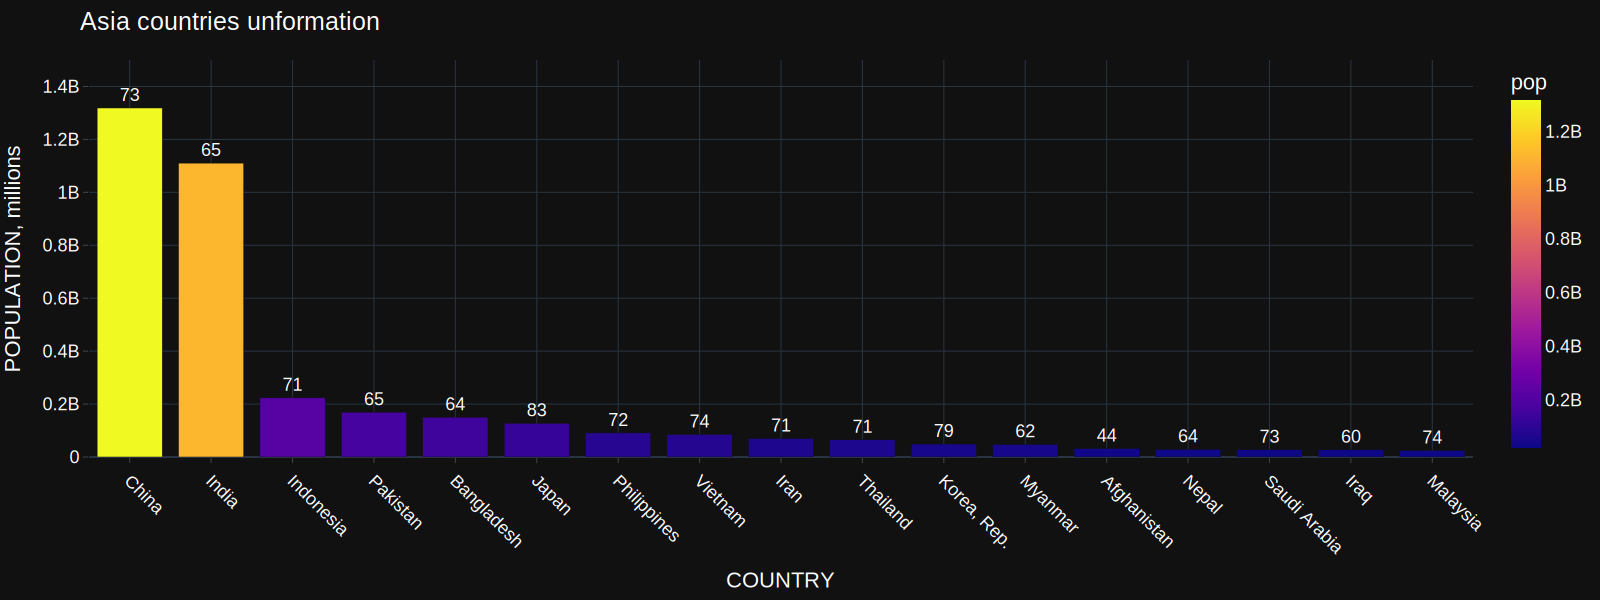

In [11]:
fig = px.bar(
        data_frame = df_asia,
        x = 'country',
        y = 'pop',
        color = 'pop',
        text = 'lifeExp',
        )

fig.update_traces(
        texttemplate = '%{text:.2s}',
        textposition = 'outside',
        )
fig.update_layout(
        title = 'Asia countries unformation',
        xaxis_title = 'COUNTRY',
        yaxis_title = 'POPULATION, millions',

        font = font_config(size = 18),

        yaxis = y_axis_config,
        yaxis_range = [0, 1_500_000_000],

        xaxis = x_axis_config,
        xaxis_tickangle = 45,

        autosize = True,
        width = 1600,
        height = 600
        )